In [96]:
PATH_DATABASE = "./database/adult"
DATABASE_EXTENSION = ".csv"
TARGET_NAME = "class"

In [97]:
def load_data ():
    return pd.read_csv(PATH_DATABASE + DATABASE_EXTENSION, encoding='latin-1', delimiter=',')

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.impute import SimpleImputer 
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [99]:
def split_features_target (db):
    return db.drop(TARGET_NAME, axis = 1), db[TARGET_NAME]

In [100]:
def encode_data (db, cols):
    le = LabelEncoder()

    for col in cols:
        db[col] = le.fit_transform(db[col])
    return db

In [101]:
def dummy_data (db, cols):
    return pd.get_dummies(db, columns = cols)

In [102]:
def fill_missingValues (db):
    si = SimpleImputer(strategy='most_frequent')

    db = db.replace('?', np.nan)
    return pd.DataFrame(si.fit_transform(db), columns=db.columns)

In [103]:
def under_sampling (X, y):
    #tl = TomekLinks()
    rus = RandomUnderSampler(random_state=49)
    return rus.fit_resample (X, y)


In [104]:
database = load_data()
database

,age,work-class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [105]:
database = fill_missingValues(database)

In [106]:
database.dropna(axis=0, how='any', inplace=True)
database.drop(['fnlwgt','education'], axis=1, inplace=True)
features, target = split_features_target(database)
features

,age,work-class,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


**Colunas para dummy e encode**

In [107]:
colsToEncode = ['sex']
colsToDummy = ['work-class', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

**Encoding**

In [108]:
features = encode_data(features, colsToEncode)
features = dummy_data(features, colsToDummy)
features

,age,edu-num,sex,capital-gain,capital-loss,hours-pre-week,work-class_Federal-gov,work-class_Local-gov,work-class_Never-worked,work-class_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0,0,0,36,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,64,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,38,13,1,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,44,13,1,5455,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Preparando para rodar árvore**

In [109]:
x_prev = features.values
X_train, X_test, y_train, y_test = train_test_split(x_prev, target, test_size=0.2, random_state=0)

In [110]:
X_train, y_train = under_sampling(X_train, y_train)

In [111]:
y_train.value_counts()

<=50K    9390
>50K     9390
Name: class, dtype: int64

**Rodando GRID SEARCH**

In [112]:
# params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 4, 6, 8, 10],
#     'max_features':[None,'sqrt','log2', 0.2, 0.4, 0.6, 0.8, 1],
#     'splitter': ['best', 'random'],
#     'random_state': [0,42],
#     'min_samples_split': [2, 4, 6, 8, 10],
#     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
#     }

In [113]:
# decisionTreeGS = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params,
#     cv=3,
#     n_jobs=5,
#     verbose=1,
# )
# decisionTreeGS.fit(X_train, y_train)
# print(decisionTreeGS.best_params_)
# print(decisionTreeGS.best_score_)

In [114]:
dt_best_params = {}
decisionTree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 0.6, min_samples_split= 8, min_weight_fraction_leaf= 0.0, random_state= 0, splitter= 'best') 
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.6,
                       min_samples_split=8, random_state=0)

In [115]:
previsoes = decisionTree.predict(X_test)
previsoes

array(['>50K', '>50K', '>50K', ..., '>50K', '<=50K', '>50K'], dtype=object)

0.7983416931108609

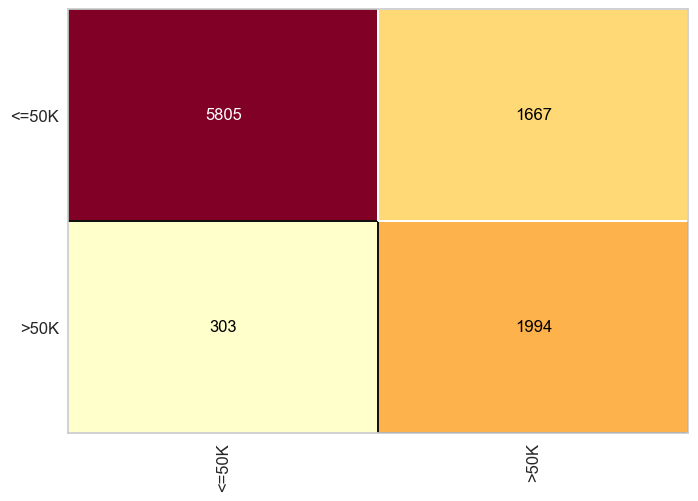

In [116]:
confusion = ConfusionMatrix(decisionTree)
confusion.fit(X_train, y_train)
confusion.score(X_test, y_test)

In [117]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.95      0.78      0.85      7472
        >50K       0.54      0.87      0.67      2297

    accuracy                           0.80      9769
   macro avg       0.75      0.82      0.76      9769
weighted avg       0.85      0.80      0.81      9769



**Naive Bayes**

In [118]:
# params_nb = {
#     'var_smoothing': np.logspace(0,-9, num=100),
# }

# naiveBayesGS = GridSearchCV(
#     estimator=GaussianNB(),
#     param_grid=params_nb,
#     cv=3,
#     n_jobs=5,
#     verbose=1,
# )
# naiveBayesGS.fit(X_train, y_train)
# print(naiveBayesGS.best_params_)
# print(naiveBayesGS.best_score_)

0.8021291841539564

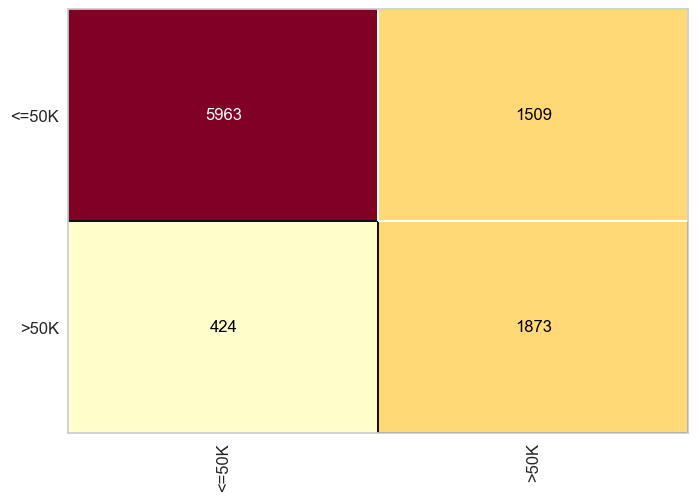

In [119]:
naive_bayes = GaussianNB(var_smoothing = 1e-09)
naive_bayes.fit(X_train, y_train)
previsoes_nb = naive_bayes.predict(X_test)
confusion_nb = ConfusionMatrix(naive_bayes)
confusion_nb.fit(X_train, y_train)
confusion_nb.score(X_test, y_test)

In [120]:
previsoes_nb = naive_bayes.predict(X_test)
print(classification_report(y_test, previsoes_nb))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      7472
        >50K       0.55      0.82      0.66      2297

    accuracy                           0.80      9769
   macro avg       0.74      0.81      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [121]:
# params_rf = {
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [120]
# }

# randomForestGS = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=params_rf,
#     cv=3,
#     n_jobs=5,
#     verbose=1,
# )
# randomForestGS.fit(X_train, y_train)
# print(randomForestGS.best_params_)
# print(randomForestGS.best_score_)

c:\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8167673252124066

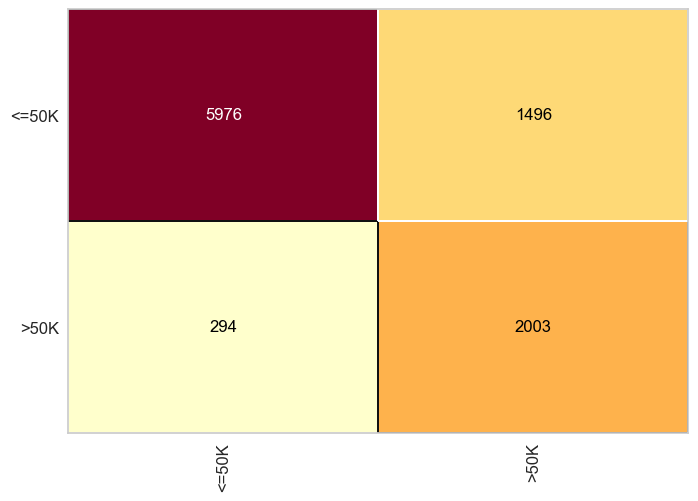

In [122]:
random_forest = RandomForestClassifier(bootstrap= False, max_depth= 30, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 120)
random_forest.fit(X_train, y_train)
previsoes_rf = random_forest.predict(X_test)
confusion_rf = ConfusionMatrix(random_forest)
confusion_rf.fit(X_train, y_train)
confusion_rf.score(X_test, y_test)

In [123]:
previsoes_rf = random_forest.predict(X_test)
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

       <=50K       0.95      0.80      0.87      7472
        >50K       0.57      0.87      0.69      2297

    accuracy                           0.82      9769
   macro avg       0.76      0.84      0.78      9769
weighted avg       0.86      0.82      0.83      9769



In [124]:
random_forest.feature_importances_

array([1.04544472e-01, 1.37156832e-01, 2.39912963e-02, 1.02913326e-01,
       2.59491393e-02, 6.18436170e-02, 2.98209714e-03, 2.91483917e-03,
       2.73754208e-08, 7.14273760e-03, 3.93320952e-03, 5.42157181e-03,
       1.66523189e-03, 2.32968206e-06, 1.51104631e-02, 2.40380715e-04,
       1.49278783e-01, 9.14787135e-04, 7.16746553e-02, 2.72849139e-03,
       2.23379859e-03, 3.82711407e-03, 7.41773512e-06, 5.48820433e-03,
       1.93569984e-02, 4.86779996e-03, 4.72372839e-03, 4.63475818e-03,
       1.37974130e-02, 1.71336848e-04, 1.03586200e-02, 1.59802730e-03,
       3.65581983e-03, 2.48247087e-03, 2.40839466e-03, 8.16636631e-02,
       2.70851507e-02, 2.99807735e-03, 3.26698877e-02, 1.63284903e-02,
       1.83627391e-02, 1.17328974e-03, 1.61847825e-03, 3.50127556e-03,
       6.23747523e-04, 3.59296442e-03, 5.05953482e-05, 3.69659159e-04,
       3.13543289e-04, 1.87404469e-04, 2.14665472e-04, 3.09982701e-04,
       2.30408747e-05, 1.32716885e-04, 2.16840045e-04, 2.94305248e-05,
      